# Twitter Brexit Analysis

## Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

## Reading File

The data used in this project are tweets exported from Twitter in context of UK brexit. 

The generated data are stored as JSON files. In total they are approximately 18GB of compressed Tar files.

The dataset is collected on 5 days around brexit.

* 21 June 2016
* 22 June 2016
* 23 June 2016
* 22 September 2017
* 23 September 2017

For each day there are JSON files for tweets about brexit collected every hour in 24 hours.

Each JSON files varies with one another in size, ranging from 4MB in to 500MB.

One of the question for this data is how do we analyze the most used hashtags in this topics of Brexit. As how they  

This project will try to analyze the tweets based on the top retweeted tweets and their hashtags.

I use the bigest JSON file to analyze with around 34MB file size. In the JSON file the tweets are stored line by line. Each line represent a fully formatted JSON file representing tweet informations.

In [22]:
twitter_filename = "2017-09-23:11:05:01.json"
twitter_file = open(twitter_filename, 'r')

## JSON to DataFrame

In [23]:
with twitter_file as f:
    first_line = f.readline()
    print (first_line)
    second_line = f.readline()
    print(second_line)

{"in_reply_to_status_id_str":null,"in_reply_to_status_id":null,"created_at":"Sat Sep 23 10:05:04 +0000 2017","in_reply_to_user_id_str":null,"source":"<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client<\/a>","retweeted_status":{"in_reply_to_status_id_str":null,"in_reply_to_status_id":null,"created_at":"Sat Sep 23 09:59:13 +0000 2017","in_reply_to_user_id_str":null,"source":"<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone<\/a>","retweet_count":2,"retweeted":false,"geo":null,"filter_level":"low","in_reply_to_screen_name":null,"is_quote_status":false,"id_str":"911530384046870528","in_reply_to_user_id":null,"favorite_count":0,"id":911530384046870528,"text":"#Brexit will turn EU from equal partner to competitor with better trade deals worldwide &amp; a more attractive market 500 vs 65 Mln! #ScotRef","place":null,"lang":"en","quote_count":0,"favorited":false,"coordinates":null,"truncated":false,"reply_count":0,"entities":{"urls":[],"hashtags"

To make things more easy to read we need to change the string read by line into JSON. We can use the JSON library from python to convert the regular string to a more readable JSON format.

In [59]:
first_line_json = json.loads(first_line)
print(json.dumps(first_line_json, indent=2))
# By default Pandas will limit the display of columns. This command will bypass the limit.
pd.set_option('display.max_columns', None)

tweets = []
df_tweet = pd.DataFrame()
df_tweet = df_tweet.append(json_normalize(first_line_json))

{
  "in_reply_to_status_id_str": null,
  "in_reply_to_status_id": null,
  "created_at": "Sat Sep 23 10:05:04 +0000 2017",
  "in_reply_to_user_id_str": null,
  "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>",
  "retweeted_status": {
    "in_reply_to_status_id_str": null,
    "in_reply_to_status_id": null,
    "created_at": "Sat Sep 23 09:59:13 +0000 2017",
    "in_reply_to_user_id_str": null,
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
    "retweet_count": 2,
    "retweeted": false,
    "geo": null,
    "filter_level": "low",
    "in_reply_to_screen_name": null,
    "is_quote_status": false,
    "id_str": "911530384046870528",
    "in_reply_to_user_id": null,
    "favorite_count": 0,
    "id": 911530384046870528,
    "text": "#Brexit will turn EU from equal partner to competitor with better trade deals worldwide &amp; a more attractive market 500 vs 65 Mln! #ScotRef",
    "place": null,
    "l

We can see how many columns the data has and how many column the tweet has.

In [25]:
print(df_tweet.columns)
print('There are {} columns for the tweet'.format(len(df_tweet.columns)))

Index(['contributors', 'coordinates', 'created_at', 'entities.hashtags',
       'entities.symbols', 'entities.urls', 'entities.user_mentions',
       'favorite_count', 'favorited', 'filter_level',
       ...
       'user.profile_text_color', 'user.profile_use_background_image',
       'user.protected', 'user.screen_name', 'user.statuses_count',
       'user.time_zone', 'user.translator_type', 'user.url', 'user.utc_offset',
       'user.verified'],
      dtype='object', length=135)
There are 135 columns for the tweet


In [26]:
df_tweet

,contributors,coordinates,created_at,entities.hashtags,entities.symbols,entities.urls,entities.user_mentions,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,quote_count,reply_count,retweet_count,retweeted,retweeted_status.contributors,retweeted_status.coordinates,retweeted_status.created_at,retweeted_status.entities.hashtags,retweeted_status.entities.symbols,retweeted_status.entities.urls,retweeted_status.entities.user_mentions,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.filter_level,retweeted_status.geo,retweeted_status.id,retweeted_status.id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_status_id_str,retweeted_status.in_reply_to_user_id,retweeted_status.in_reply_to_user_id_str,retweeted_status.is_quote_status,retweeted_status.lang,retweeted_status.place,retweeted_status.quote_count,retweeted_status.reply_count,retweeted_status.retweet_count,retweeted_status.retweeted,retweeted_status.source,retweeted_status.text,retweeted_status.truncated,retweeted_status.user.contributors_enabled,retweeted_status.user.created_at,retweeted_status.user.default_profile,retweeted_status.user.default_profile_image,retweeted_status.user.description,retweeted_status.user.favourites_count,retweeted_status.user.follow_request_sent,retweeted_status.user.followers_count,retweeted_status.user.following,retweeted_status.user.friends_count,retweeted_status.user.geo_enabled,retweeted_status.user.id,retweeted_status.user.id_str,retweeted_status.user.is_translator,retweeted_status.user.lang,retweeted_status.user.listed_count,retweeted_status.user.location,retweeted_status.user.name,retweeted_status.user.notifications,retweeted_status.user.profile_background_color,retweeted_status.user.profile_background_image_url,retweeted_status.user.profile_background_image_url_https,retweeted_status.user.profile_background_tile,retweeted_status.user.profile_banner_url,retweeted_status.user.profile_image_url,retweeted_status.user.profile_image_url_https,retweeted_status.user.profile_link_color,retweeted_status.user.profile_sidebar_border_color,retweeted_status.user.profile_sidebar_fill_color,retweeted_status.user.profile_text_color,retweeted_status.user.profile_use_background_image,retweeted_status.user.protected,retweeted_status.user.screen_name,retweeted_status.user.statuses_count,retweeted_status.user.time_zone,retweeted_status.user.translator_type,retweeted_status.user.url,retweeted_status.user.utc_offset,retweeted_status.user.verified,source,text,timestamp_ms,truncated,user.contributors_enabled,user.created_at,user.default_profile,user.default_profile_image,user.description,user.favourites_count,user.follow_request_sent,user.followers_count,user.following,user.friends_count,user.geo_enabled,user.id,user.id_str,user.is_translator,user.lang,user.listed_count,user.location,user.name,user.notifications,user.profile_background_color,user.profile_background_image_url,user.profile_background_image_url_https,user.profile_background_tile,user.profile_banner_url,user.profile_image_url,user.profile_image_url_https,user.profile_link_color,user.profile_sidebar_border_color,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified
0,None,None,Sat Sep 23 10:05:04 +0000 2017,"[{'indices': [15, 22], 'text': 'Brexit'}]",[],[],"[{'indices': [3, 13], 'screen_name': 'BigMarky...",0,False,low,None,911531854305652738,911531854305652738,None,None,None,None,None,False,en,None,0,0,0,False,None,None,Sat Sep 23 09:59:13 +0000 2017,"[{'indices': [0, 7], 'text': 'Brexit'}, {'indi...",[],[],[],0,False,low,None,911530384046870528,911530384046870528,None,None,None,None,None,False,en,None,0,0,2,False,"<

## Put the rest of the JSON File to DataFrame

We only need certain columns though

In [134]:
df_tweets = pd.DataFrame()
with open(twitter_filename, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        df_tweet = json_normalize(tweet)
        df_tweets = df_tweets.append(df_tweet.loc[:,['id','user.id', 'entities.hashtags','retweeted_status.retweet_count', 'text', 'user.followers_count']], ignore_index=True)

/Users/benapratama/miniconda3/envs/ds4d/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/Users/benapratama/miniconda3/envs/ds4d/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [198]:
df_tweets.info()
print()
print ('we could double check the current state of the new data frame by using "info" command')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 6 columns):
id                                5735 non-null int64
user.id                           5735 non-null int64
entities.hashtags                 5735 non-null object
retweeted_status.retweet_count    4134 non-null float64
text                              5735 non-null object
user.followers_count              5735 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 268.9+ KB

we could double check the current state of the new data frame by using "info" command


In [135]:
df_tweets.head()

,id,user.id,entities.hashtags,retweeted_status.retweet_count,text,user.followers_count
0,911531854305652738,880874466393411585,"[{'indices': [15, 22], 'text': 'Brexit'}]",2.0,RT @BigMarkyB: #Brexit will turn EU from equal partner to competitor with better trade deals worldwide &amp; a more attractive market 500 vs 65…,173
1,911531855555506177,707546304784769024,"[{'indices': [51, 58], 'text': 'Brexit'}]",372.0,RT @2010LeeHurst: This will be my final comment on #Brexit as it is now confirmed it is not happening. Now we wait for our imposed migrant…,74
2,911531855878295552,888726432221773824,"[{'indices': [78, 81], 'text': 'EU'}, {'indices': [132, 137], 'text': 'Iran'}]",135.0,"RT @Oceaanfietser: Any deal with Islamists terrorists in Tehran is illegal.If #EU politicians love islamists invite them to Europe, #Iran i…",2
3,911531857266610176,883617751666835458,"[{'indices': [78, 81], 'text': 'EU'}, {'indices': [132, 137], 'text': 'Iran'}]",136.0,"RT @Oceaanfietser: Any deal with Islamists terrorists in Tehran is illegal.If #EU politicians love islamists invite them to Europe, #Iran i…",1
4,911531866280341504,889420557590028288,"[{'indices': [78, 81], 'text': 'EU'}, {'indices': [132, 137], 'text': 'Iran'}]",137.0,"RT @Oceaanfietser: Any deal with Islamists terrorists in Tehran is illegal.If #EU politicians love islamists invite them to Europe, #Iran i…",4


## Top Retweet 

In [148]:
def top_retweets(inputfile,k,n):
    # get all the tweets that has retweet count more than n times
    rt =  inputfile[inputfile['retweeted_status.retweet_count']>=n]
    # sort it accordingly, in descending order
    rt_sorted = rt.sort_values('retweeted_status.retweet_count',ascending=False)
    # return the top k entries
    return rt_sorted[:k]

So by creating a dictionary function we could get all the tweet that has retweet count more than 'n' times from the data frame. And then we could sort it according to the count value from the bigest to smallest. 

In [137]:
output=top_retweets(df_tweets,10,25)
output

,id,user.id,entities.hashtags,retweeted_status.retweet_count,text,user.followers_count
5638,911546619627175937,1160910768,[],28291.0,"RT @finance_LL: I'm going to cancel Netflix and negotiate with each film producer separately, to get the best deal for me and my family #Br…",699
5482,911546119104208896,2673414765,"[{'indices': [21, 28], 'text': 'Brexit'}]",6737.0,RT @ComedyCentralUK: #Brexit: A Titanic Failure https://t.co/ocdgEUCJDA,651
5291,911545509889888256,457037653,"[{'indices': [21, 28], 'text': 'Brexit'}]",6736.0,RT @ComedyCentralUK: #Brexit: A Titanic Failure https://t.co/ocdgEUCJDA,176
5012,911544736107855872,4186306797,"[{'indices': [21, 28], 'text': 'Brexit'}]",6735.0,RT @ComedyCentralUK: #Brexit: A Titanic Failure https://t.co/ocdgEUCJDA,1702
2598,911538203953438721,780328587924803586,"[{'indices': [66, 80], 'text': 'PrayForBiafra'}, {'indices': [81, 96], 'text': 'FreeNnamdikanu'}, {'indices': [97, 117], 'text': 'MakeBiafraFreeAgain'}, {'indices': [118, 121], 'text': 'UN'}, {'indices': [122, 125], 'text': 'AU'}, {'indices': [126, 129], 'text': 'EU'}, {'indices': [130, 133], 'text': 'US'}, {'indices': [134, 137], 'text': 'UK'}]",5035.0,RT @NkirukaNistoran: PLS JOIN US LIVE \nON RBL\nNEWS HOUR\nEVERY 7PM\n#PrayForBiafra\n#FreeNnamdikanu\n#MakeBiafraFreeAgain\n#UN #AU #EU #US #UK h…,148
5656,911546688011108352,125143408,"[{'indices': [21, 28], 'text': 'Brexit'}]",1555.0,RT @CraigWhitington: #Brexit - When should the UK leave? \nPlease vote and RT. 🇬🇧🇪🇺,1047
5504,911546196040339457,358122099,"[{'indices': [21, 28], 'text': 'Brexit'}]",1555.0,RT @CraigWhitington: #Brexit - When should the UK leave? \nPlease vote and RT. 🇬🇧🇪🇺,299
5496,911546168773152768,5794532,"[{'indices': [21, 28], 'text': 'Brexit'}]",1554.0,RT @CraigWhitington: #Brexit - When should the UK leave? \nPlease vote and RT. 🇬🇧🇪🇺,557
5381,911545774743355392,4105039342,"[{'indices': [21, 28], 'text': 'Brexit'}]",1553.0,RT @CraigWhitington: #Brexit - When should the UK leave? \nPlease vote and RT. 🇬🇧🇪🇺,413
5190,911545205458980869,14932463,"[{'indices': [21, 28], 'text': 'Brexit'}]",1552.0,RT @CraigWhitington: #Brexit - When should the UK leave? \nPlease vote and RT. 🇬🇧🇪🇺,582


### Visualise the top retweets histogram

In [205]:
x_axis = ('a','b','c','d','e','f','g','h','i','j')

In [118]:
y_axis = output['retweeted_status.retweet_count'].astype(int).values.tolist()
print (y_axis)

[28291, 6737, 6736, 6735, 5035, 1555, 1555, 1554, 1553, 1552]


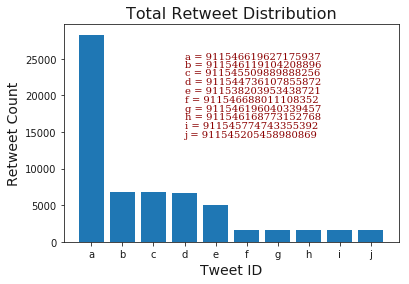

In [217]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10,
        }

plt.text('d', 25000, r'a = 911546619627175937 ', fontdict=font)
plt.text('d', 23800, r'b = 911546119104208896 ', fontdict=font)
plt.text('d', 22700, r'c = 911545509889888256 ', fontdict=font)
plt.text('d', 21500, r'd = 911544736107855872 ', fontdict=font)
plt.text('d', 20300, r'e = 911538203953438721 ', fontdict=font)
plt.text('d', 19100, r'f = 911546688011108352', fontdict=font)
plt.text('d', 17900, r'g = 911546196040339457 ', fontdict=font)
plt.text('d', 16700, r'h = 911546168773152768 ', fontdict=font)
plt.text('d', 15500, r'i = 911545774743355392 ', fontdict=font)
plt.text('d', 14300, r'j = 911545205458980869 ', fontdict=font)
plt.bar(x_axis,y_axis)
plt.title('Total Retweet Distribution',fontsize=16)
plt.xlabel('Tweet ID',fontsize=14)
plt.ylabel('Retweet Count',fontsize=14)
plt.show()
print ()

In this bar chart one perticular user reach above 25.000 retweet count. while most of the user did not reach 10.000 retweet count.

### Tweet that has most retweeted count

In [196]:
mostRT = output['text'].iloc[0]
pd.set_option('display.max_colwidth',-1)
mostRT

"RT @finance_LL: I'm going to cancel Netflix and negotiate with each film producer separately, to get the best deal for me and my family #Br…"

### Top RT againts follower count

In [143]:
x_axis = output['user.followers_count']

In [144]:
y_axis = output['retweeted_status.retweet_count'].astype(int).values.tolist()

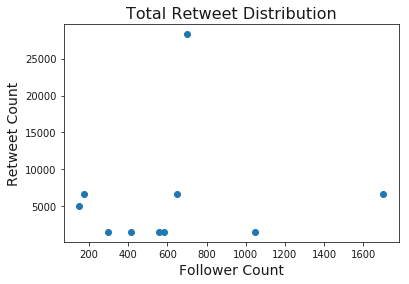

In [147]:
plt.scatter(x_axis,y_axis)
plt.title('Total Retweet Distribution',fontsize=16)
plt.xlabel('Follower Count',fontsize=14)
plt.ylabel('Retweet Count',fontsize=14)
plt.show()

In this particular sample of 2017-09-23:11:05:01 twitter data we could see in this scatter plot that follower count and retweet count argueably does not have any liniear relationships.  

## Top Hashtags

In [168]:
def top_hashtags(inputfile,k):
    # extract hashtag entities from each entry
    entries =  inputfile['entities.hashtags']
    # create dictionary to count the hashtag appearance
    dict_ht = {}
    for entry in entries: # for each line in our input
        for ht in entry: # for every hashtag in each line
            # extract hashtags entities    
            dict_ht[ht['text']] = 1 + dict_ht.get(ht['text'],0)
          
    # sort it accordingly, in descending order
    ht_sorted = [(ht,dict_ht[ht]) for ht in sorted(dict_ht,key=dict_ht.get,reverse=True)]
    # return the top k entries
    return ht_sorted[:k]

In [173]:
output1 = top_hashtags(output,10)
output1

[('Brexit', 8),
 ('PrayForBiafra', 1),
 ('FreeNnamdikanu', 1),
 ('MakeBiafraFreeAgain', 1),
 ('UN', 1),
 ('AU', 1),
 ('EU', 1),
 ('US', 1),
 ('UK', 1)]

In [171]:
print ('most used hashtag in Top Retweet is : Brexit')

most used hashtag in Top Retweet is : Brexit


### Visualise most used hashtag

In [218]:
x_axis1 = []
y_axis1 = []
for item in output1:
    x_axis1.append(item[0])
    y_axis1.append(item[1])

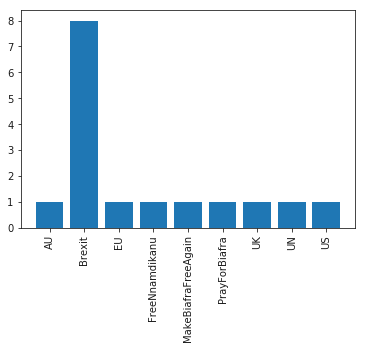

In [219]:
plt.bar(x_axis1,y_axis1)
plt.xticks(rotation=90)
plt.show()

### Top Hashtags in  The Data Frame

In [194]:
def top_hashtags(inputfile,k):
    # extract hashtag entities from each entry
    entries =  inputfile['entities.hashtags']
    # create dictionary to count the hashtag appearance
    dict_ht = {}
    for entry in entries: # for each line in our input
        for ht in entry: # for every hashtag in each line
            # extract hashtags entities    
            dict_ht[ht['text']] = 1 + dict_ht.get(ht['text'],0)
          
    # sort it accordingly, in descending order
    ht_sorted = [(ht,dict_ht[ht]) for ht in sorted(dict_ht,key=dict_ht.get,reverse=True)]
    # return the top k entries
    return ht_sorted[:k]

In [195]:
output2 = top_hashtags(df_tweets,10)
output2

[('Brexit', 1801),
 ('EU', 1219),
 ('Iran', 648),
 ('brexit', 355),
 ('Referendum', 216),
 ('florencespeech', 200),
 ('Remain', 159),
 ('Europe', 150),
 ('referendum', 145),
 ('StopBrexit', 108)]

### Visualise most used hashtag in the data frame

In [187]:
x_axis2 = []
y_axis2 = []
for item in output2:
    x_axis2.append(item[0])
    y_axis2.append(item[1])

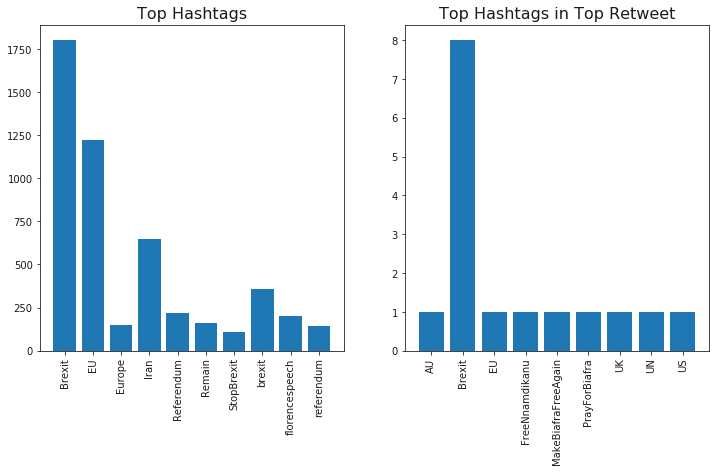

In [221]:
f = plt.figure(5,figsize=(12,6))
plt.subplot(121)
plt.title('Top Hashtags',fontsize=16)
plt.bar(x_axis2,y_axis2)
plt.xticks(rotation=90)


plt.subplot(122)
plt.title('Top Hashtags in Top Retweet',fontsize=16)
plt.bar(x_axis1,y_axis1)
plt.xticks(rotation=90)
plt.show()

We could see that #Brexit does really popular in both data sample followed by #EU in second place in almost 1250 appearance count. Eventhough it only appear once in the Top Hashtags in Top Retweet data sample.

## Reflect & Hypothesis

With this project comes to a conclussions I found that the followers a user have, possibly does not directly corelate to how many times their tweets being retweeted. Also in this topic #brexit argueably is the most used hashtag. By slicing the pandas we could get a layered result.   